# Exploratory Data Analysis

In [1]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

C:\Users\bhush\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv(r"C:\Users\bhush\OneDrive\Desktop\Cleaned_Data.csv")

In [3]:
df.head()

Unnamed: 0                                            reviews  stars  \
0           1  Not Verified |  Easy check in on the way to He...      1   
1           2  ✅ Trip Verified |  Online check in worked fine...     10   
2           3  ✅ Trip Verified |. The BA first lounge at Term...     10   
3           4  Not Verified | Paid a quick visit to Nice yest...      2   
4           5  ✅ Trip Verified |  Words fail to describe this...      4   

         date         country  verified  \
0  2023-05-23           Spain     False   
1  2023-05-23           Chile      True   
2  2023-05-22  United Kingdom      True   
3  2023-05-22  United Kingdom     False   
4  2023-05-19   United States      True   

                                              corpus  
0  verified easy check way heathrow flight time i...  
1  online check worked fine quick security check ...  
2  ba first lounge terminal zoo pm dirty table us...  
3  verified paid quick visit nice yesterday heath...  
4  word fail describe last awful flight baby acro...

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

## What is the average overall rating for British Airways?

In [5]:
df.stars.mean()

4.755637936360828

## What is the total counts for each ratings?

Text(0.5, 0.98, 'Rating Count')

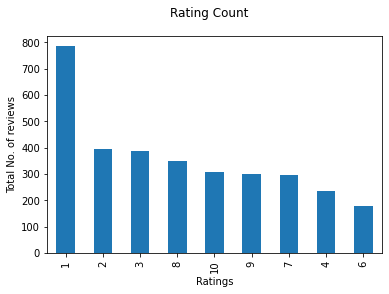

In [6]:
df['stars'].value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total No. of reviews")
plt.suptitle("Rating Count")

In [7]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [8]:
df_ratings = df_ratings.reset_index()

In [9]:
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [10]:
df_ratings

Stars  total_counts  pct_values
0      1           786       24.28
1      2           396       12.23
2      3           389       12.02
3      8           349       10.78
4     10           308        9.51
5      9           299        9.24
6      7           296        9.14
7      4           235        7.26
8      6           179        5.53

Text(0.5, 1.0, 'Counts for each ratings')

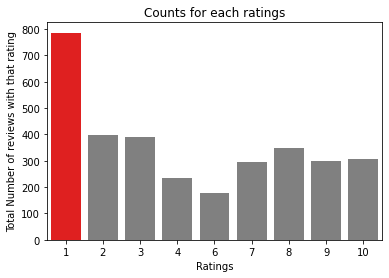

In [11]:
clrs = ['Red' if (x ==  max(df_ratings['total_counts'])) else 'grey' for x in df_ratings['total_counts'] ]
ax = sns.barplot(x=df_ratings['Stars'], y=df_ratings['total_counts'], data=df_ratings, errwidth=0,
                palette=clrs)

ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [12]:
# Unique countries BA recieved the reviews from
print(f"{len(df['country'].unique())} Unique Countries")

68 Unique Countries


## Which country most review comes from?

In [13]:
top_countries=pd.DataFrame(df['country'].value_counts().head()).reset_index()

In [14]:
top_countries

index  country
0  United Kingdom     2048
1   United States      343
2       Australia      141
3          Canada      100
4         Germany       54

In [15]:
top_countries.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

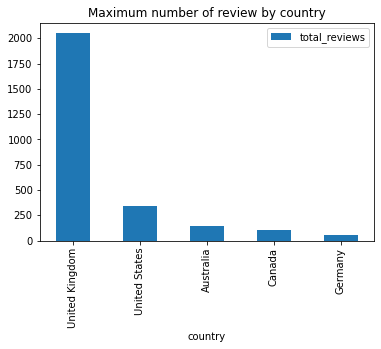

In [16]:
top_countries.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

## On average highest rating as per country

In [17]:
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()

In [18]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

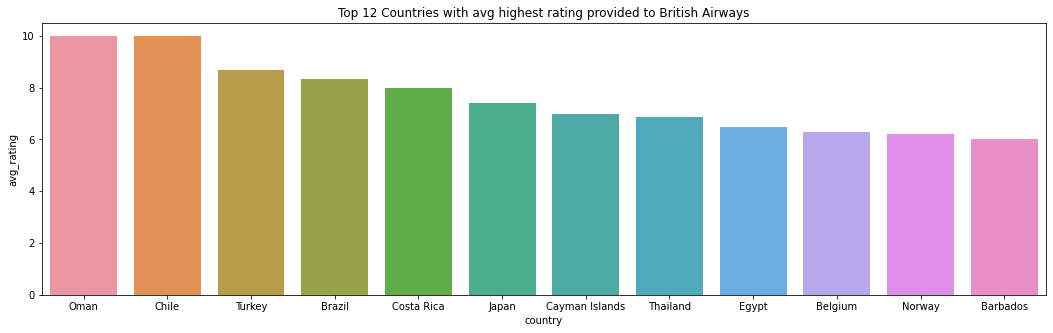

In [19]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])

ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

In [20]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

In [21]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

We can see between year 2020 to 2022 the no. of star ratings were drastically decreased. Primary reason might be covid-19 as beacause of it travelling to other countries were restricted. 

In [22]:
df.head()

reviews  stars       date  \
0  Not Verified |  Easy check in on the way to He...      1 2023-05-23   
1  ✅ Trip Verified |  Online check in worked fine...     10 2023-05-23   
2  ✅ Trip Verified |. The BA first lounge at Term...     10 2023-05-22   
3  Not Verified | Paid a quick visit to Nice yest...      2 2023-05-22   
4  ✅ Trip Verified |  Words fail to describe this...      4 2023-05-19   

          country  verified                                             corpus  
0           Spain     False  verified easy check way heathrow flight time i...  
1           Chile      True  online check worked fine quick security check ...  
2  United Kingdom      True  ba first lounge terminal zoo pm dirty table us...  
3  United Kingdom     False  verified paid quick visit nice yesterday heath...  
4   United States      True  word fail describe last awful flight baby acro...

In [23]:
reviews = " ".join(df.corpus)

## Word Frequency

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")
stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)
#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

In [25]:
all_fdist

seat         3975
service      2628
time         2137
food         2117
london       2005
crew         1979
good         1853
cabin        1827
class        1687
hour         1654
one          1453
staff        1398
business     1372
economy      1256
get          1197
check        1149
passenger    1142
first        1135
drink        1095
meal         1023
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'london'),
  Text(5, 0, 'crew'),
  Text(6, 0, 'good'),
  Text(7, 0, 'cabin'),
  Text(8, 0, 'class'),
  Text(9, 0, 'hour'),
  Text(10, 0, 'one'),
  Text(11, 0, 'staff'),
  Text(12, 0, 'business'),
  Text(13, 0, 'economy'),
  Text(14, 0, 'get'),
  Text(15, 0, 'check'),
  Text(16, 0, 'passenger'),
  Text(17, 0, 'first'),
  Text(18, 0, 'drink'),
  Text(19, 0, 'meal')])

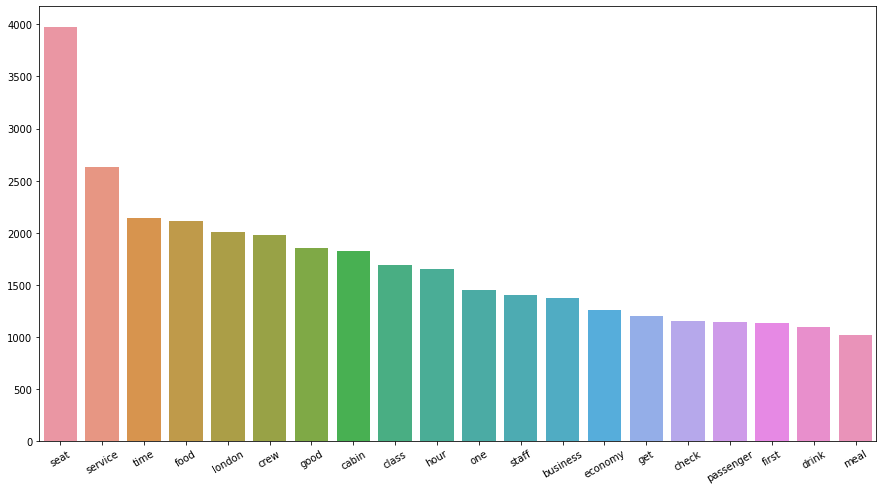

In [26]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)

plt.xticks(rotation=30)

From above barplot we can see what the customers are mainly talking about.
Top 3 things the customers have been talking about is:
    
    1.Seat
    
    2.Service
    
    3.Time
    

<AxesSubplot:>

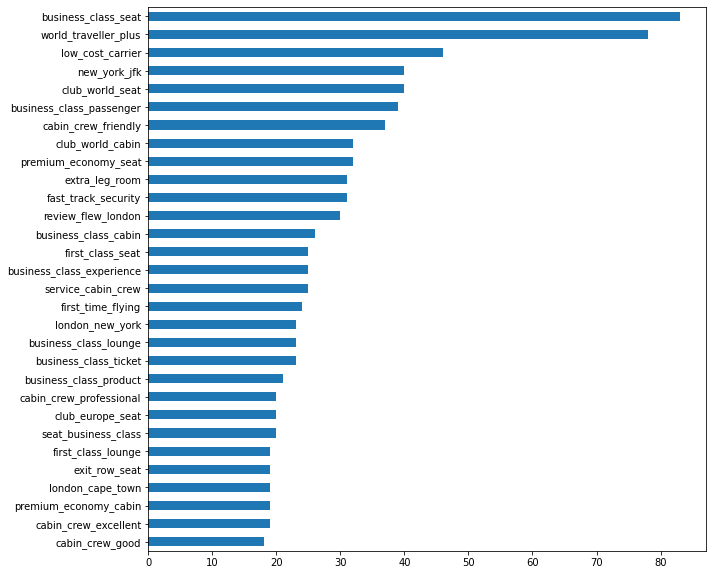

In [27]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams):
    from nltk import ngrams
    
    ngrams = ngrams(new_words,number_of_ngrams)
    
    ngram_fd = FreqDist(ngrams).most_common(30)
    
    ngrams_sorted = {k:v for k,v in sorted(ngram_fd,key = lambda item:item[0])}
    
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,3)
    

From the above distribution we can see what words have been used in combination with other words.This can give and idea about the relationship between the words used together.We can see athe the end of distribution that customers have been taking about good service provided by cabin crew.

Now lets split up the review based on the ratings given by the customers
and create visualizations for it.

Here I have distributed the reviews b/w 1-3 stars as bad review,3-5 stars as average review and 7-10 stars as good review

In [28]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

In [29]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

In [30]:
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")

<AxesSubplot:>

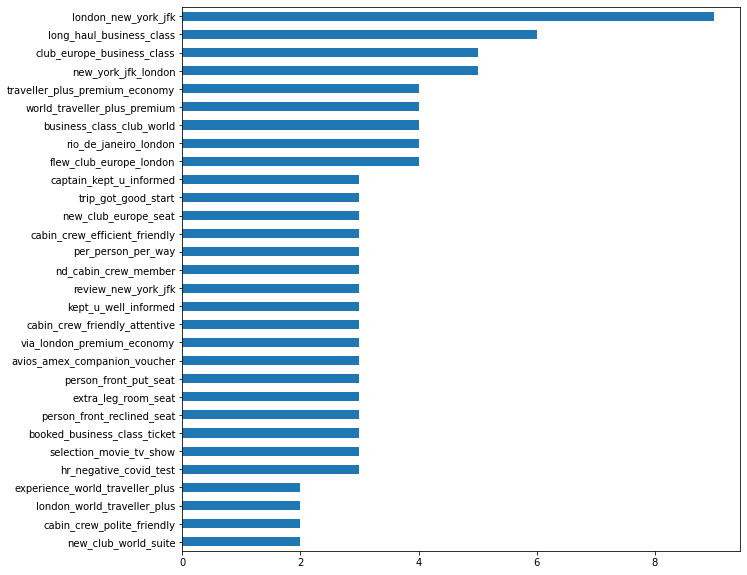

In [31]:
new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<AxesSubplot:>

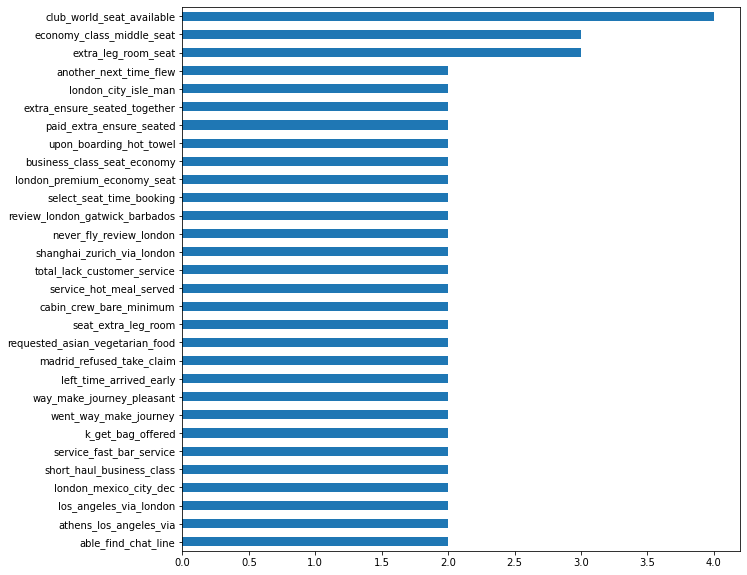

In [32]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<AxesSubplot:>

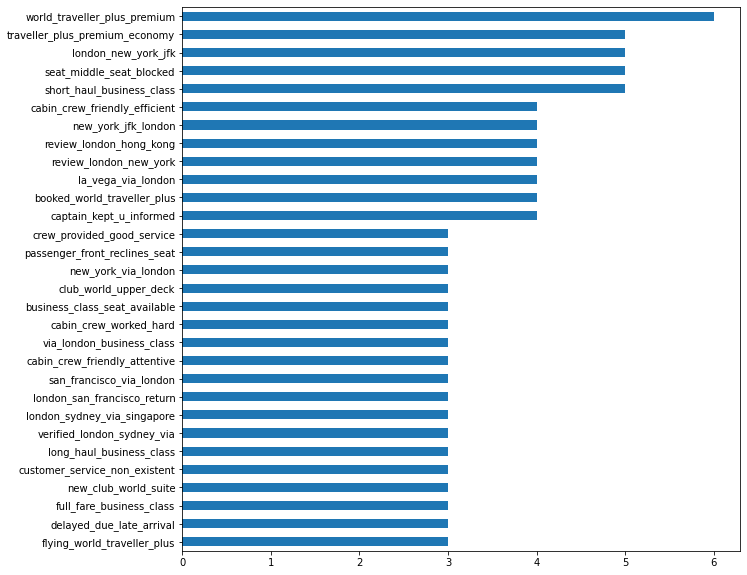

In [33]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [34]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [35]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

3237 number of reviews between -0.2 and 0.2 polarity score
3237 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2286 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.

In [36]:
%%capture
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0
    
for i in range(len(df.corpus)):
    
    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bhush\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
df['label'].value_counts()

 1    2097
-1    1034
 0     106
Name: label, dtype: int64

## Word Cloud

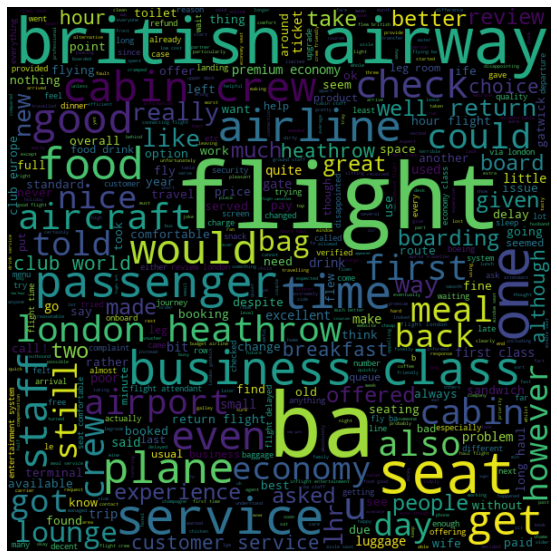

In [38]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.

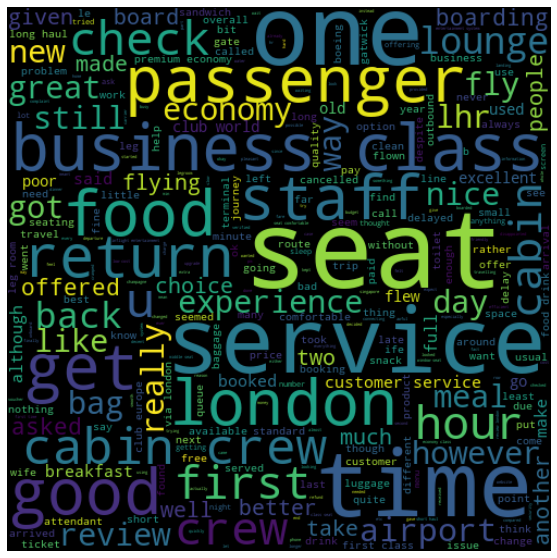

In [39]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()